### **Hoursepower vs Mileage**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight",
           "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv(url, names=columns, delim_whitespace=True, na_values="?")

df = df.dropna()

X = df[["horsepower"]].values
y = df["mpg"].values

print("First 5 rows:")
print(df.head())

/tmp/ipython-input-556853229.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=columns, delim_whitespace=True, na_values="?")


First 5 rows:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


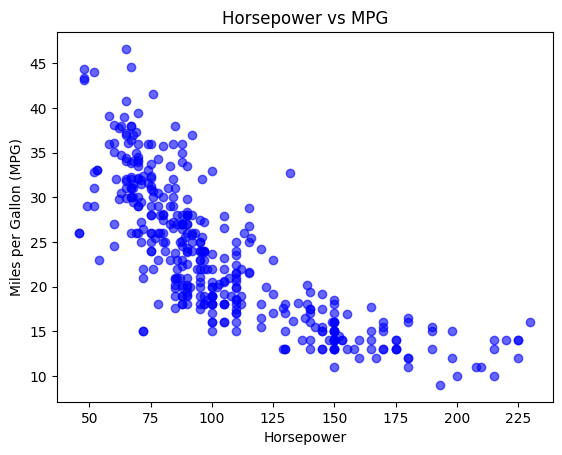

In [3]:
plt.scatter(X, y, color="blue", alpha=0.6)
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Horsepower vs MPG")
plt.show()

In [4]:
poly = PolynomialFeatures(degree=6 , include_bias = True)
X_poly = poly.fit_transform(X)
print (X_poly.shape)

(392, 7)


In [5]:
def total_cost (X_poly, y, w, b,lambda_):
    cost = 0
    (m,n) = X_poly.shape
    for i in range (n) :
        f_wb = np.dot(X_poly[i], w) + b
        cost = cost + (f_wb - y[i])**2 + (lambda_) * (w[i] ** 2)
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [6]:
def gradient (X_poly, y, w, b,lambda_):
    m = X_poly.shape[0]
    dj_dw = np.dot(X_poly.T, (np.dot(X_poly, w) + b) - y) / m + (lambda_ / m) * w
    dj_db = np.sum(np.dot(X_poly, w) + b - y) / m
    return dj_dw, dj_db

In [7]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    J_history = []
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient(X, y, w, b,lambda_)
        for j in range (len(w)):
            w[j] = w[j] - alpha * dj_dw[j]
            b = b - alpha * dj_db

    return w, b

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

print("Scaled X_poly (first 5 rows):")
print(X_poly_scaled[:5])

Scaled X_poly (first 5 rows):
[[ 0.          0.66413273  0.45997873  0.25377656  0.08228878 -0.04091582
  -0.1195472 ]
 [ 0.          1.57459447  1.513418    1.34829375  1.12387764  0.88541985
   0.66410582]
 [ 0.          1.18439658  1.03133562  0.81555043  0.58672446  0.38118028
   0.21549889]
 [ 0.          1.18439658  1.03133562  0.81555043  0.58672446  0.38118028
   0.21549889]
 [ 0.          0.92426466  0.73545438  0.51463421  0.30759759  0.14021107
   0.0184119 ]]


In [9]:

w, b = gradient_descent(X_poly_scaled, y, np.zeros(X_poly_scaled.shape[1]), 0, total_cost, gradient, 0.01, 100000, 0.003)

print("\nFinal weights (w):", w)
print("Final bias (b):", b)


Final weights (w): [  0.         -14.06334094   0.50748475   6.50592085   5.04752735
   0.2802913   -4.31674286]
Final bias (b): 23.445918367346767


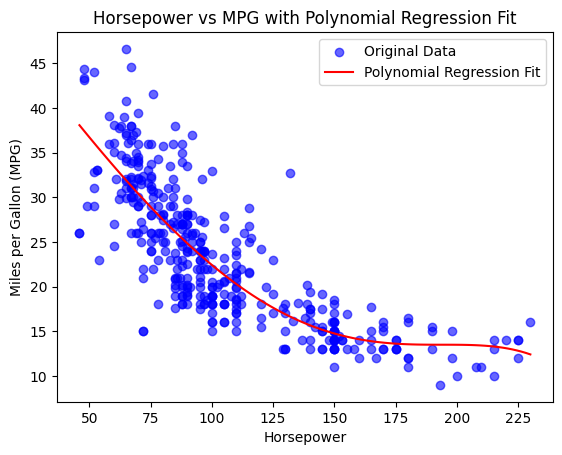

In [10]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

X_plot_poly = poly.transform(X_plot)

X_plot_scaled = scaler.transform(X_plot_poly)

y_plot = np.dot(X_plot_scaled, w) + b

plt.scatter(X, y, color="blue", alpha=0.6, label="Original Data")

plt.plot(X_plot, y_plot, color="red", label="Polynomial Regression Fit")

plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Horsepower vs MPG with Polynomial Regression Fit")
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_scaled = np.dot(X_poly_scaled, w) + b

mae = mean_absolute_error(y, y_pred_scaled)
mse = mean_squared_error(y, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_scaled)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 3.25
Mean Squared Error (MSE): 18.93
Root Mean Squared Error (RMSE): 4.35
R-squared (R2): 0.69
